# 06 Visualizing PCs

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl
import joblib
from collections import defaultdict

from statsmodels.api import OLS

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

sys.path.append('../..')
from nonlinear_significance.scripts.TreeTester import TreeTester
from nonlinear_significance.scripts.util import TreeTransformer

from simulations_util import *
from visualizing_PCs_util import *

## 1. Linear model

In [3]:
n_grid = [100, 200, 400, 800]
p = 10
k = 0
params = {"s": 2,
          "sigma": 5,
          "beta": 1}
# results = run_sims(linear_model, n_grid, p, params, k, normalize=False)
output_file = "results/lin_pca_experiment.pkl"
# pkl.dump(results, open(output_file, "wb"))
# results = pkl.load(open(output_file, "rb"))

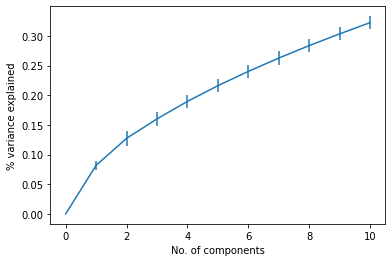

In [10]:
means, stds = make_pca_variance_plot(results, 200, save=False, experiment="lin")

In [515]:
results[200][0]["pca_results"].round(2)

,pca_var_exp,corr_with_base_feat,corr_with_target,y_var_explained,y_var_exp_norm,t-statistic
0,0.24,-0.93,-0.93,0.04,1.50,-4.68
1,0.08,-0.07,-0.07,0.00,0.01,-0.40
2,0.06,0.28,0.28,0.00,0.03,-0.71
3,0.04,-0.13,-0.13,0.01,0.23,1.84
4,0.03,0.07,0.07,0.00,0.06,0.95
5,0.03,0.03,0.03,0.00,0.13,1.38
6,0.02,-0.07,-0.07,0.01,0.49,-2.68
7,0.02,-0.01,-0.01,0.01,0.21,-1.73
8,0.02,-0.02,-0.02,0.01,0.40,2.42
9,0.02,-0.01,-0.01,0.03,1.06,3.93


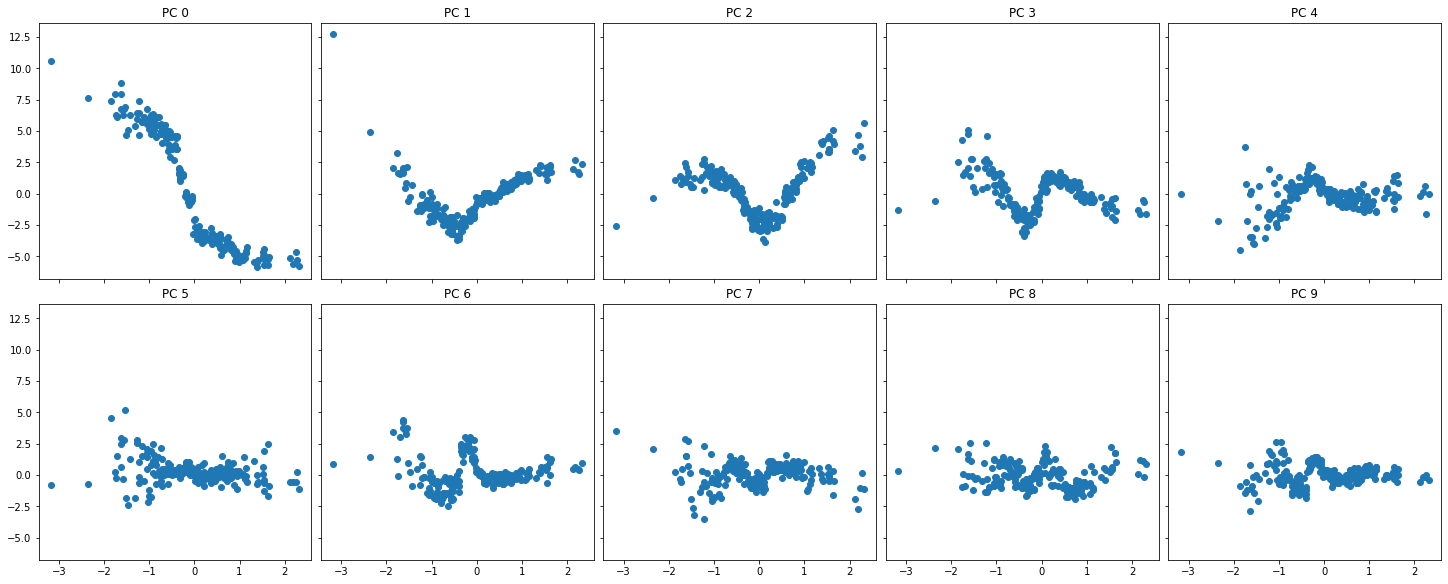

In [460]:
n = 200
X = np.random.randn(n, p)
make_plot(results[200][0]["tree_transformer"], X, c_plotted=10, save=True, experiment="lin", reference_feat=0)

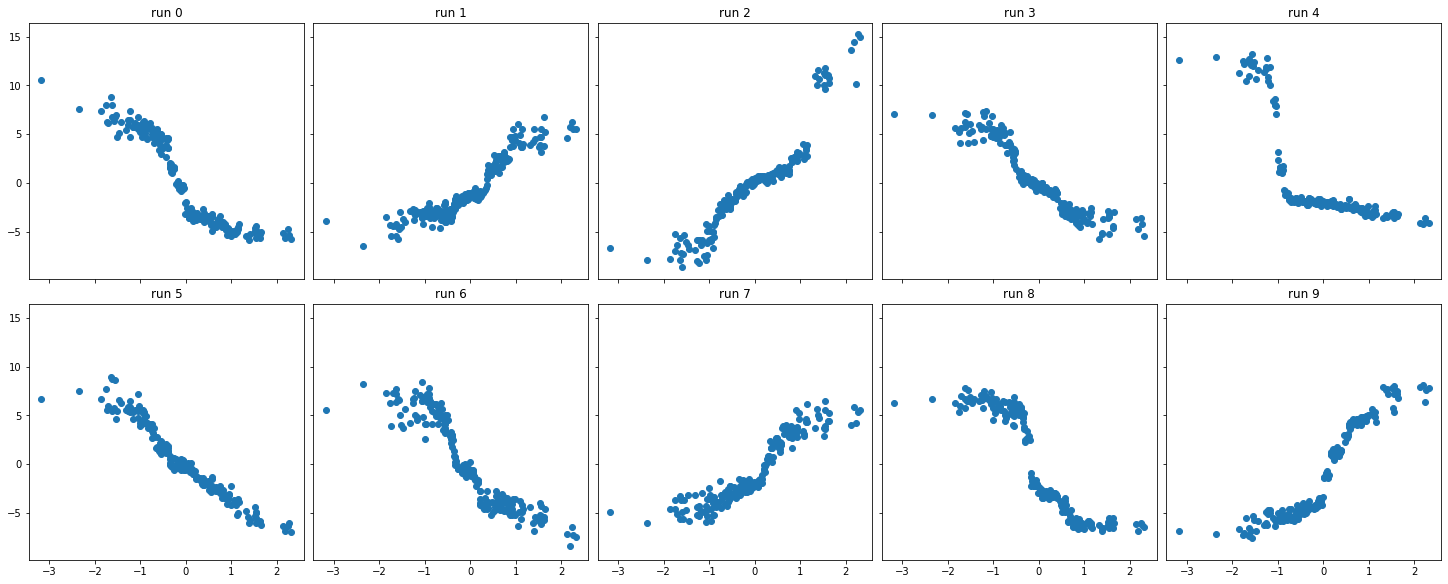

In [461]:
plot_across_runs(results, X, vary_n=False, pc_no=0, save=True, experiment_name="lin_PC0_across_runs", n=200)

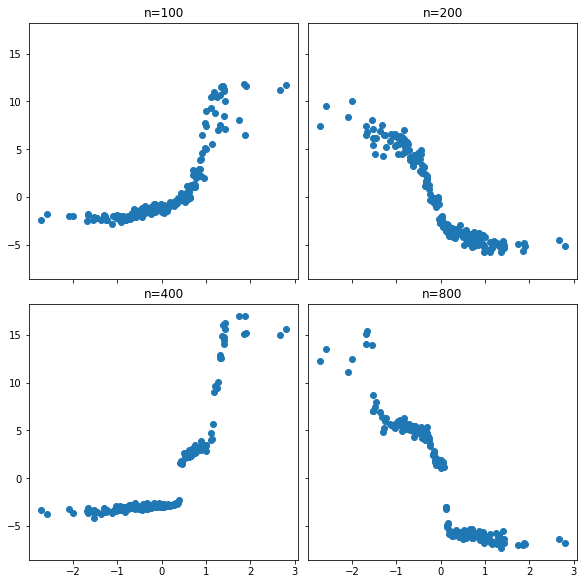

In [376]:
plot_across_runs(results, X, vary_n=True, pc_no=0, save=True, experiment_name="lin_PC0_across_n")

In [223]:
#make_2d_plot(tree_transformer, X_val, c_plotted=6, save=False, experiment="lin")

## 2. Sum of squares

In [385]:
n_grid = [100, 200, 400, 800]
p = 10
k = 0
params = {"s": 2,
          "sigma": 5,
          "beta": 1}
target_func = lambda Z : Z[:,k] ** 2
# ss_results = run_sims(sum_of_squares, n_grid, p, params, k, target_func)
output_file = "results/ss_pca_experiment.pkl"
# pkl.dump(results, open(output_file, "wb"))
# results = pkl.load(open(output_file, "rb"))

100%|██████████| 4/4 [01:11<00:00, 17.90s/it]


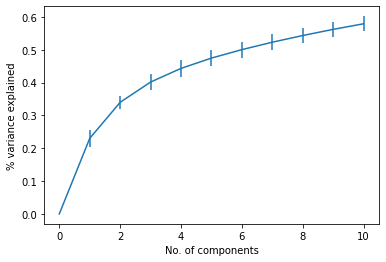

In [387]:
means, stds = make_pca_variance_plot(ss_results, 200, save=True, experiment="ss")

In [480]:
ss_results[200][1]["pca_results"][["corr_with_base_feat", "corr_with_target", "y_var_explained", "t-statistic"]].round(2)

,corr_with_base_feat,corr_with_target,y_var_explained,t-statistic
0,-0.85,0.51,0.01,0.40
1,0.45,0.75,0.04,0.71
2,-0.15,0.08,0.01,0.36
3,0.01,0.09,0.01,-0.35
4,0.11,0.10,0.00,0.22
5,0.02,0.13,0.00,-0.16
6,0.01,-0.02,0.00,0.24
7,-0.05,-0.04,0.00,0.18
8,0.12,-0.23,0.02,-0.55
9,-0.04,-0.00,0.00,-0.17


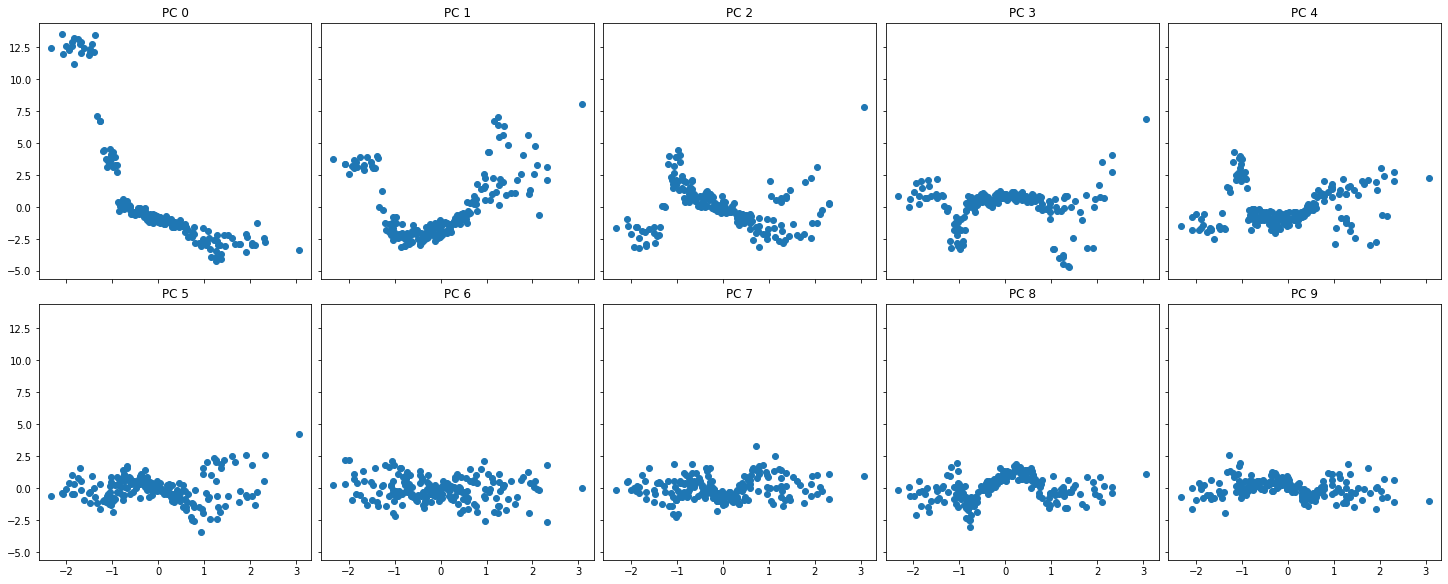

In [475]:
n = 200
X = np.random.randn(n, p)
make_plot(ss_results[n][1]["tree_transformer"], X, c_plotted=10, save=True, experiment="ss")

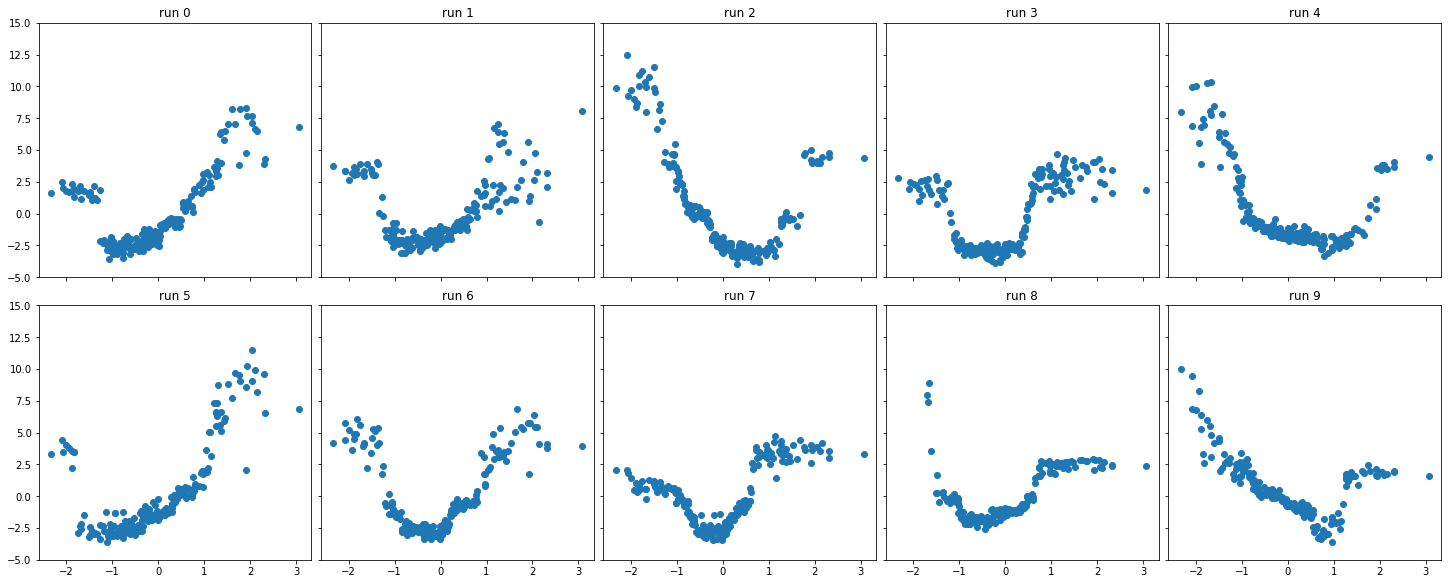

In [482]:
plot_across_runs(ss_results, X, vary_n=False, pc_no=1, save=True, experiment_name="ss_PC1_across_runs", n=200, ylim=[-5,15])

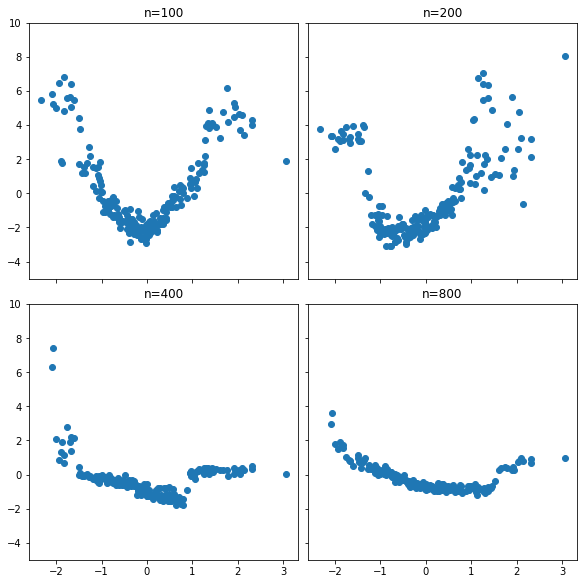

In [483]:
plot_across_runs(ss_results, X, vary_n=True, pc_no=1, save=True, experiment_name="ss_PC1_across_n", r=1, ylim=[-5,10])

## 3. LSS

In [18]:
n_grid = [100, 200, 400, 800]
p = 10
k = 0
params = {"m": 1,
          "r": 2,
          "tau": 0,
          "sigma": 0,
          "beta": 1}
target_func = lambda Z : (Z[:,k] > 0) & (Z[:,k+1] > 0)
lss_results = run_sims(lss_model, n_grid, p, params, k, target_func)
output_file = "results/lss_pca_experiment.pkl"
# pkl.dump(results, open(output_file, "wb"))
# results = pkl.load(open(output_file, "rb"))

100%|██████████| 4/4 [00:10<00:00,  2.63s/it]


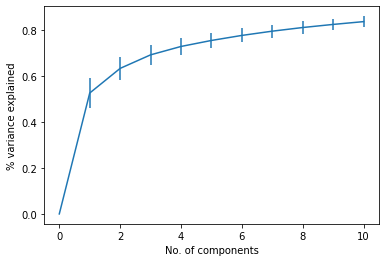

(array([0.        , 0.52598841, 0.63320374, 0.69207208, 0.72862164,
        0.75474477, 0.77663629, 0.79514313, 0.81102315, 0.82448695,
        0.8366521 ]),
 array([0.        , 0.06438573, 0.05072743, 0.04346296, 0.03793473,
        0.03421761, 0.03068796, 0.0283305 , 0.02630114, 0.02474093,
        0.02338207]))

In [19]:
make_pca_variance_plot(lss_results, 200, save=False, experiment="lss")

In [20]:
lss_results[200][0]["pca_results"].round(2)

,pca_var_exp,corr_with_base_feat,corr_with_target,y_var_explained,y_var_exp_norm,t-statistic
0,0.47,0.88,0.52,0.21,0.27,6.48
1,0.17,0.15,-0.37,0.11,0.14,-4.65
2,0.06,0.10,-0.29,0.07,0.09,-3.70
3,0.04,0.04,-0.14,0.02,0.02,-1.78
4,0.02,-0.02,0.39,0.12,0.15,4.87
5,0.02,0.00,-0.13,0.01,0.02,-1.58
6,0.02,0.07,-0.11,0.01,0.01,-1.35
7,0.01,-0.04,0.01,0.00,0.00,0.10
8,0.01,0.11,-0.16,0.02,0.02,-1.99
9,0.01,-0.07,-0.02,0.00,0.00,-0.21


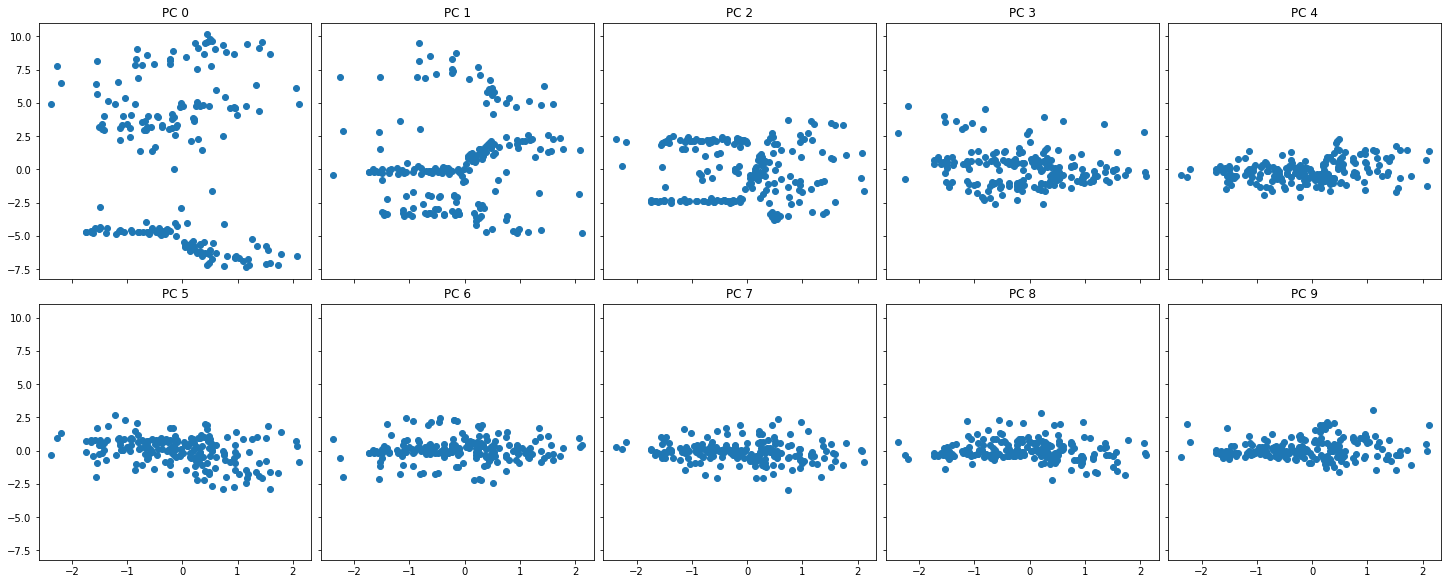

In [22]:
n = 200
X = np.random.randn(n, p)
make_plot(lss_results[n][0]["tree_transformer"], X, c_plotted=10, save=False, experiment="lss", reference_feat=0, original_feat=1)

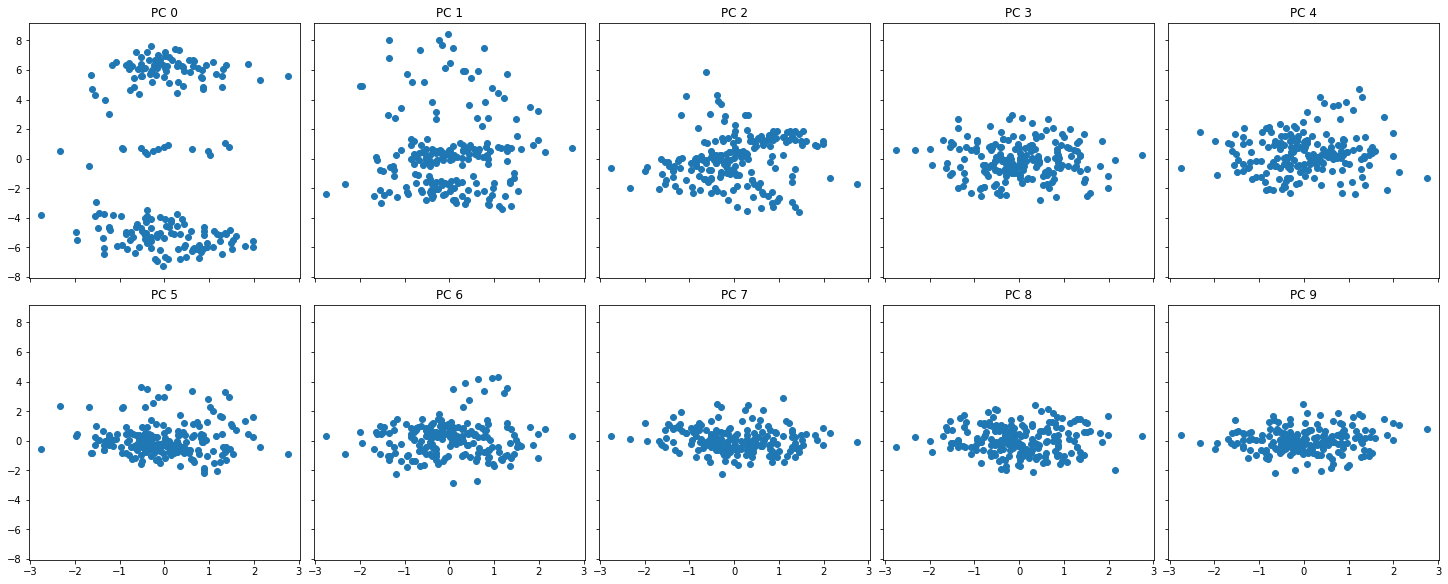

In [487]:
n = 200
X = np.random.randn(n, p)
make_plot(lss_results[n][0]["tree_transformer"], X, c_plotted=10, save=False, experiment="lss", original_feat=1)

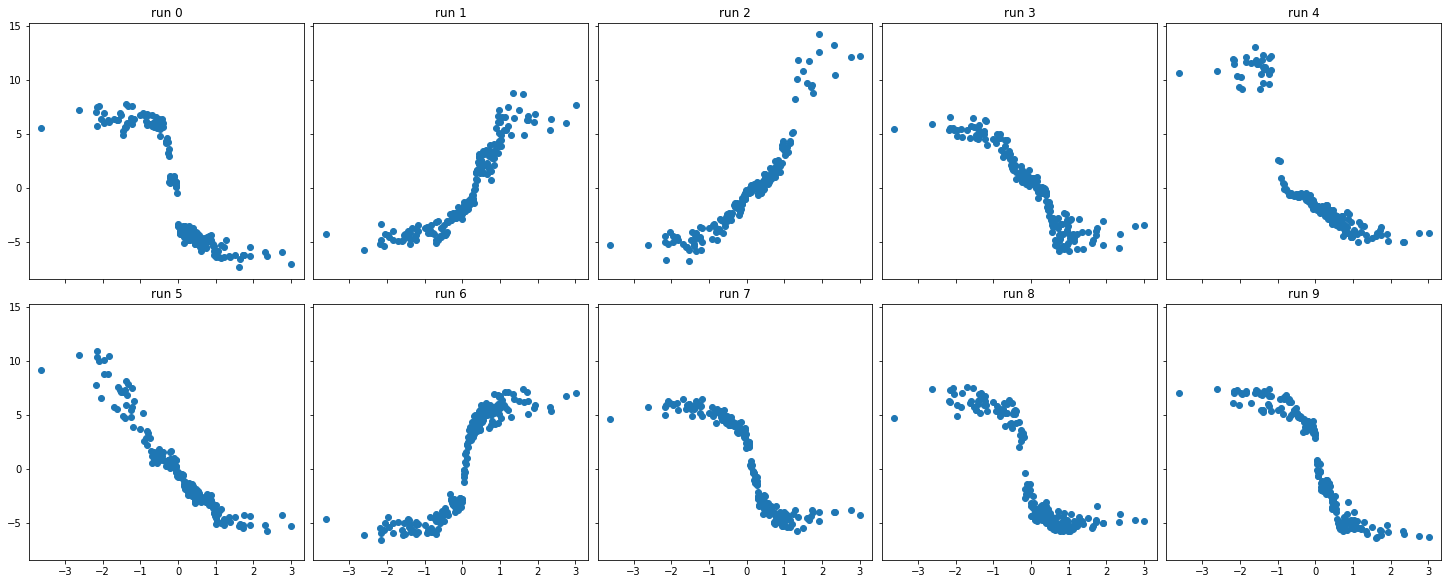

In [491]:
plot_across_runs(lss_results, X, vary_n=False, pc_no=0, save=True, experiment_name="lss_PC0_across_runs", n=200)

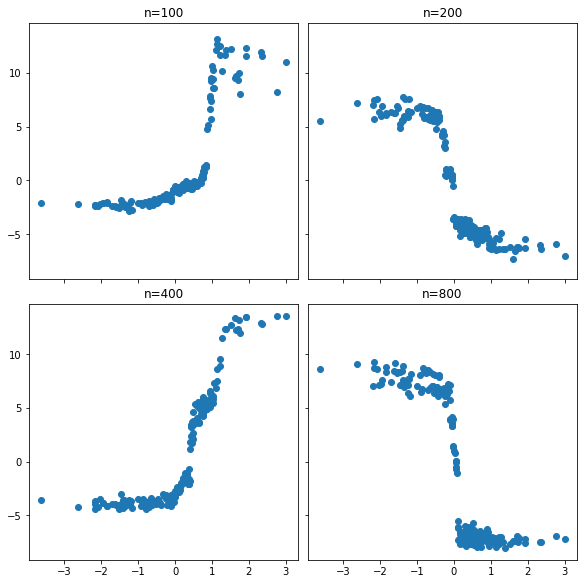

In [492]:
plot_across_runs(lss_results, X, vary_n=True, pc_no=0, save=True, experiment_name="lss_PC0_across_n", r=0)

## 4. Linear model, normalize stumps

In [3]:
n_grid = [100, 200, 400, 800]
p = 10
k = 0
params = {"s": 2,
          "sigma": 5,
          "beta": 1}
results_nn = run_sims(linear_model, n_grid, p, params, k, normalize=True)
# output_file = "results/lin_pca_experiment.pkl"
# pkl.dump(results, open(output_file, "wb"))
# results = pkl.load(open(output_file, "rb"))

100%|██████████| 4/4 [01:03<00:00, 15.92s/it]


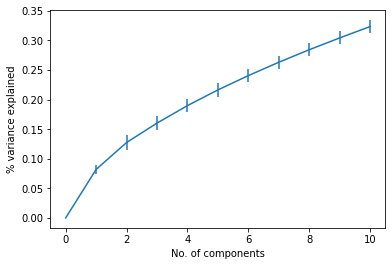

In [4]:
means, stds = make_pca_variance_plot(results_nn, 200, save=False, experiment="lin")

In [5]:
results_nn[200][0]["pca_results"].round(2)

,pca_var_exp,corr_with_base_feat,corr_with_target,y_var_explained,y_var_exp_norm,t-statistic
0,0.08,-0.94,-0.94,0.04,1.45,-4.60
1,0.04,0.09,0.09,0.00,0.00,-0.23
2,0.03,0.08,0.08,0.01,0.44,-2.54
3,0.03,-0.20,-0.20,0.00,0.00,-0.11
4,0.03,0.09,0.09,0.00,0.01,0.43
5,0.02,0.01,0.01,0.00,0.00,0.22
6,0.02,0.01,0.01,0.04,1.48,4.64
7,0.02,0.06,0.06,0.00,0.01,0.43
8,0.02,-0.07,-0.07,0.00,0.03,-0.70
9,0.02,0.09,0.09,0.00,0.08,1.06


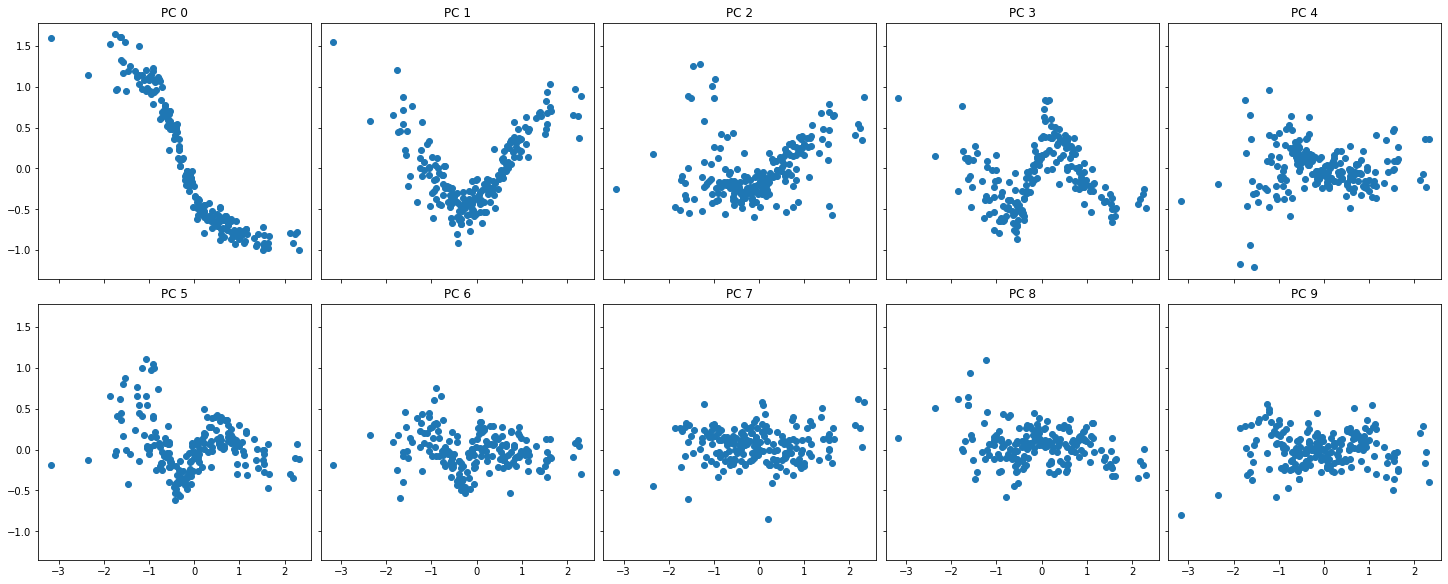

In [10]:
n = 200
X = np.random.randn(n, p)
make_plot(results_nn[200][0]["tree_transformer"], X, c_plotted=10, save=False, experiment="lin", original_feat=0)

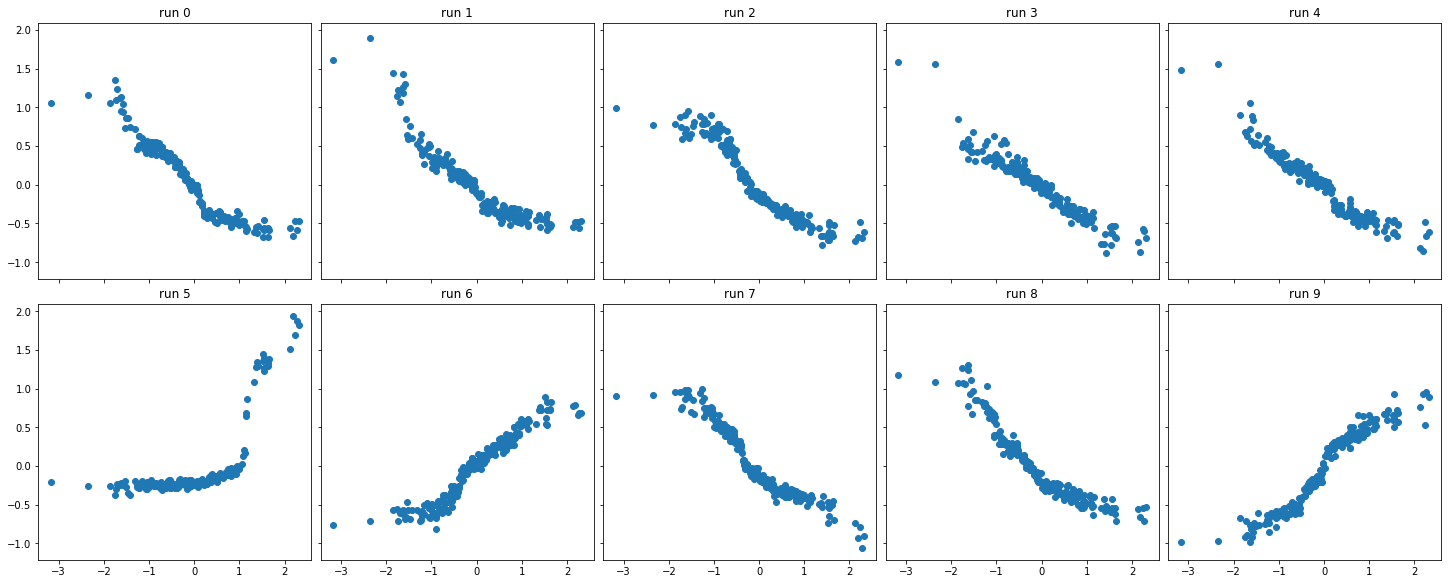

In [14]:
plot_across_runs(results_nn, X, vary_n=False, pc_no=0, save=False, experiment_name="lin_PC0_across_runs", n=800)

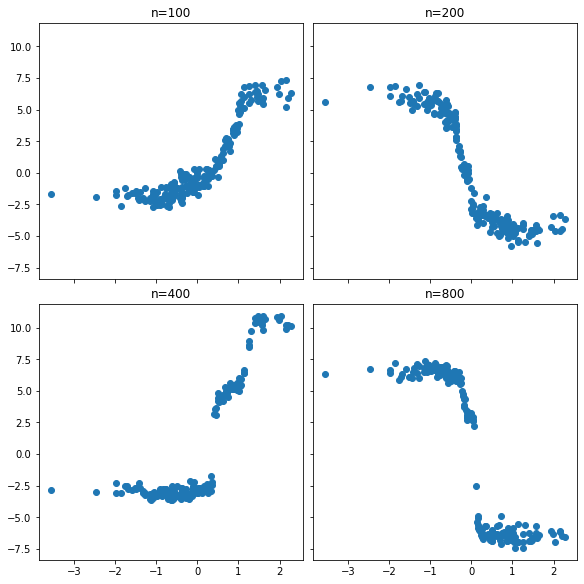

In [511]:
plot_across_runs(results_nn, X, vary_n=True, pc_no=0, save=False, experiment_name="lin_PC0_across_n")

## 5. SS with normalizations

In [31]:
n_grid = [100, 200, 400, 800]
p = 10
k = 0
params = {"s": 2,
          "sigma": 5,
          "beta": 1}
target_func = lambda Z : Z[:,k] ** 2
results_ss_nn = run_sims(sum_of_squares, n_grid, p, params, k, normalize=True, target_func=target_func)

# output_file = "results/lin_pca_experiment.pkl"
# pkl.dump(results, open(output_file, "wb"))
# results = pkl.load(open(output_file, "rb"))

100%|██████████| 4/4 [01:18<00:00, 19.54s/it]


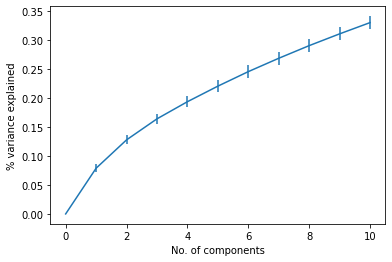

(array([0.        , 0.07877079, 0.12764764, 0.16390416, 0.19345844,
        0.22026426, 0.24529705, 0.26831278, 0.29010741, 0.31041564,
        0.32980988]),
 array([0.        , 0.00651224, 0.00763028, 0.00876349, 0.0094931 ,
        0.01002284, 0.01062298, 0.01093717, 0.01118328, 0.01112738,
        0.01097875]))

In [32]:
make_pca_variance_plot(results_ss_nn, 200, save=False, experiment="lin")

In [35]:
results_ss_nn[200][3]["pca_results"].round(2)

,pca_var_exp,corr_with_base_feat,corr_with_target,y_var_explained,y_var_exp_norm,t-statistic
0,0.09,-0.93,0.31,0.00,0.02,0.10
1,0.04,0.06,0.53,0.00,0.01,0.07
2,0.04,-0.06,0.01,0.01,0.22,0.33
3,0.03,0.11,0.08,0.05,1.43,0.85
4,0.03,0.02,0.11,0.00,0.02,0.11
5,0.02,0.02,-0.00,0.01,0.28,-0.38
6,0.02,0.02,0.12,0.00,0.07,0.19
7,0.02,0.08,-0.06,0.02,0.56,0.53
8,0.02,-0.01,0.01,0.00,0.00,-0.01
9,0.02,0.06,-0.04,0.01,0.25,0.35


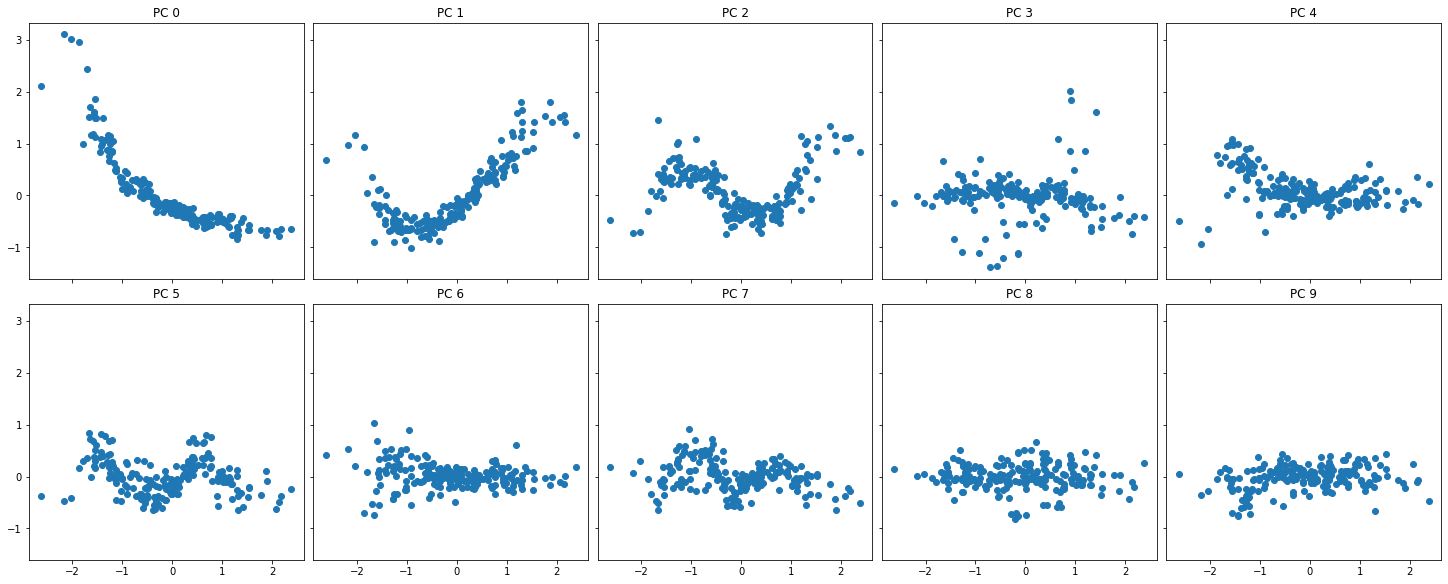

In [41]:
n = 200
X = np.random.randn(n, p)
make_plot(results_ss_nn[200][5]["tree_transformer"], X, c_plotted=10, save=False, experiment="ss", original_feat=0)

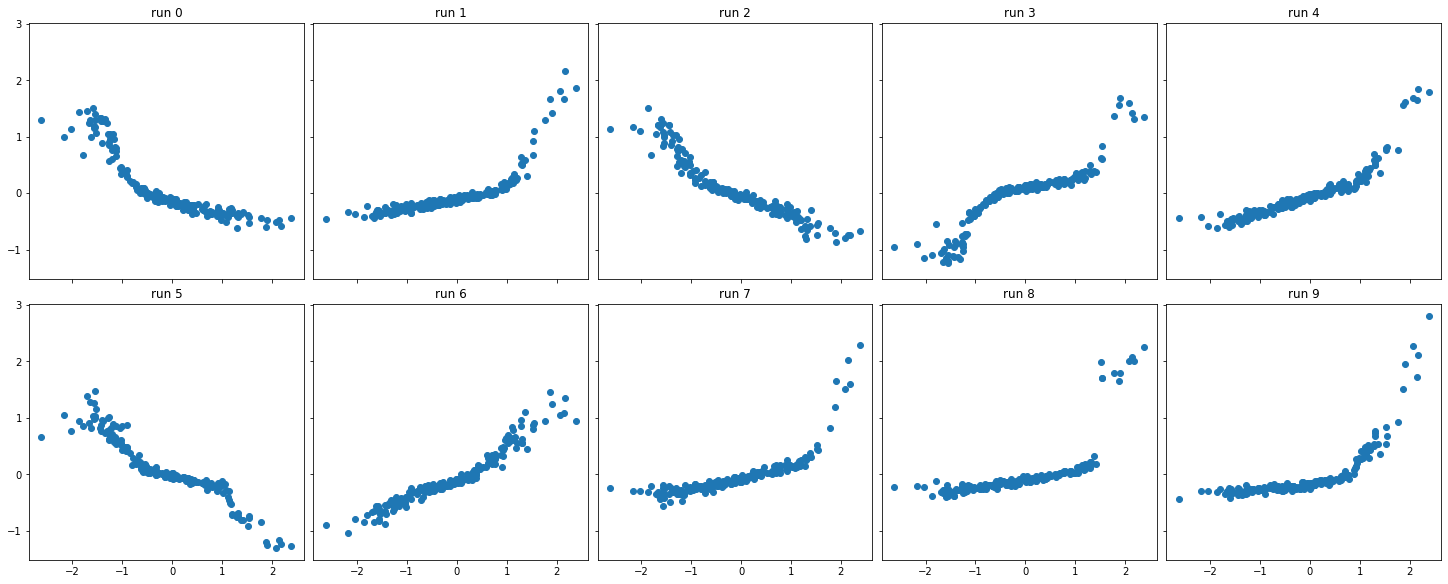

In [47]:
plot_across_runs(results_ss_nn, X, vary_n=False, pc_no=0, save=False, experiment_name="ss_PC1_across_runs", n=800)

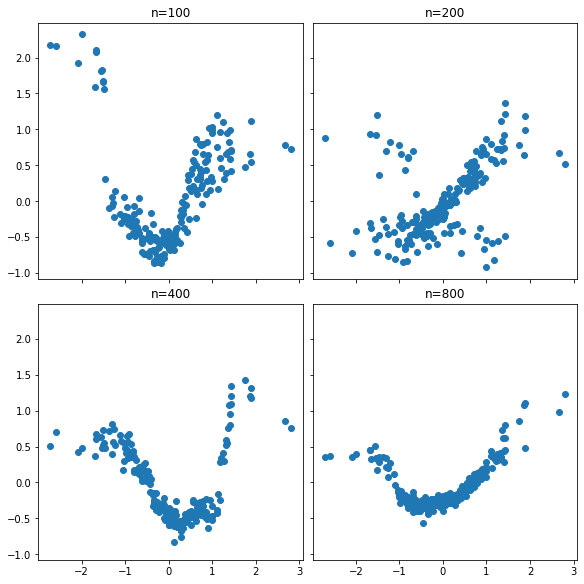

In [30]:
plot_across_runs(results_ss_nn, X, vary_n=True, pc_no=1, save=False, experiment_name="ss_PC1_across_n")

## 6. Hierarchical polynomial

In [2]:
n_grid = [100, 200, 400, 1000]
p = 10
k = 0
params = {"m": 1,
          "r": 3,
          "beta": 1,
          "heritability": 0.4}
target_func = lambda Z : Z[:,k]
hp_results = run_sims(hierarchical_poly, n_grid, p, params, k, target_func)
output_file = "results/hp_pca_experiment"
# joblib.dump(hp_results, output_file)
# results = pkl.load(open(output_file, "rb"))

100%|██████████| 4/4 [01:09<00:00, 17.39s/it]


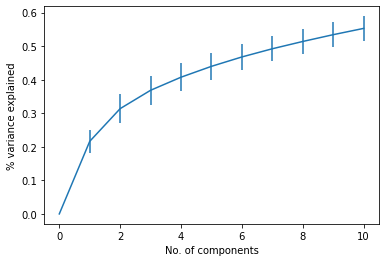

(array([0.        , 0.21637519, 0.31384327, 0.3685833 , 0.40756116,
        0.4399599 , 0.46793841, 0.49235846, 0.51407848, 0.53432178,
        0.55304227]),
 array([0.        , 0.03517178, 0.04296905, 0.04313092, 0.04210304,
        0.03993671, 0.03885474, 0.03797823, 0.03749308, 0.03682991,
        0.0362172 ]))

In [3]:
make_pca_variance_plot(hp_results, 200, save=True, experiment="hp")

In [6]:
n = 1000
hp_results[n][0]["pca_results"]

,pca_var_exp,corr_with_base_feat,corr_with_target,y_var_explained,y_var_exp_norm,t-statistic
0,0.169476,0.812408,0.812408,0.041955,0.555503,4.857004
1,0.084247,-0.533372,-0.533372,0.032420,0.429258,-4.269575
2,0.052213,0.118383,0.118383,0.000020,0.000271,-0.107319
3,0.039540,-0.039429,-0.039429,0.016179,0.214218,3.016150
4,0.025434,-0.002393,-0.002393,0.000295,0.003899,-0.406939
5,0.020607,0.011587,0.011587,0.028951,0.383332,4.034715
6,0.019510,0.061425,0.061425,0.000510,0.006748,-0.535334
7,0.016107,-0.021613,-0.021613,0.005697,0.075436,-1.789844
8,0.014295,0.004006,0.004006,0.001201,0.015903,-0.821805
9,0.013432,-0.035696,-0.035696,0.001332,0.017632,0.865325


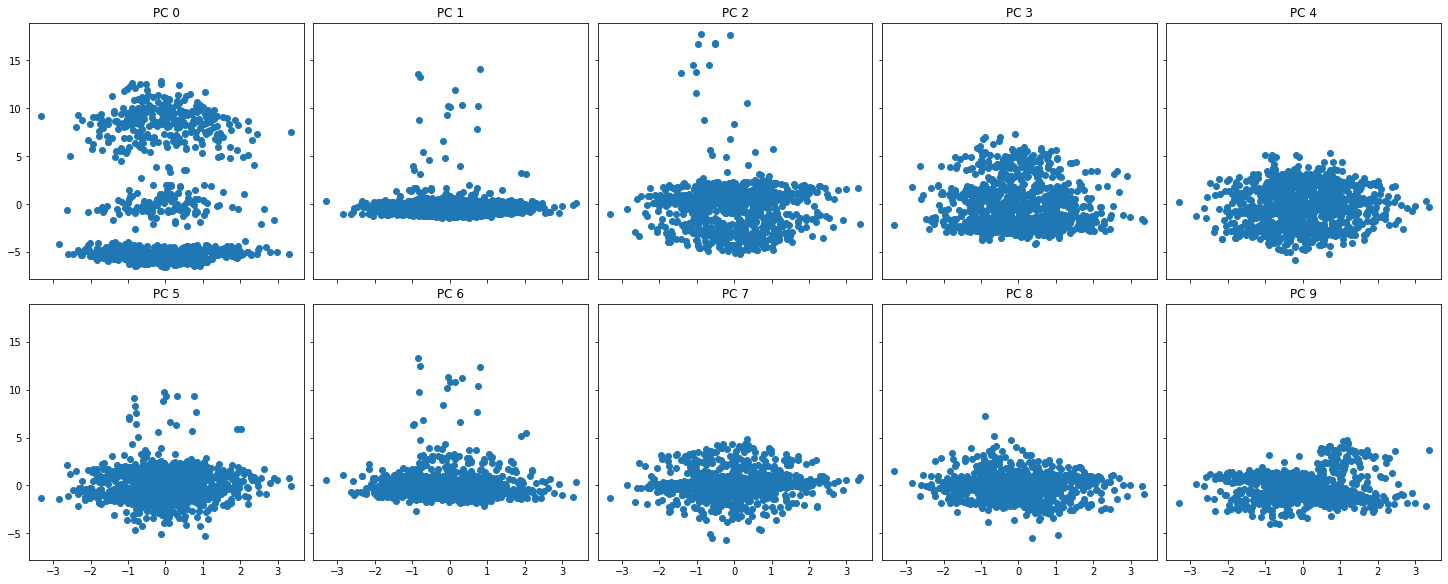

In [17]:
X = np.random.randn(n, p)
make_plot(hp_results[n][0]["tree_transformer"], X, c_plotted=10, save=True, experiment="hp", original_feat=0, reference_feat=2)

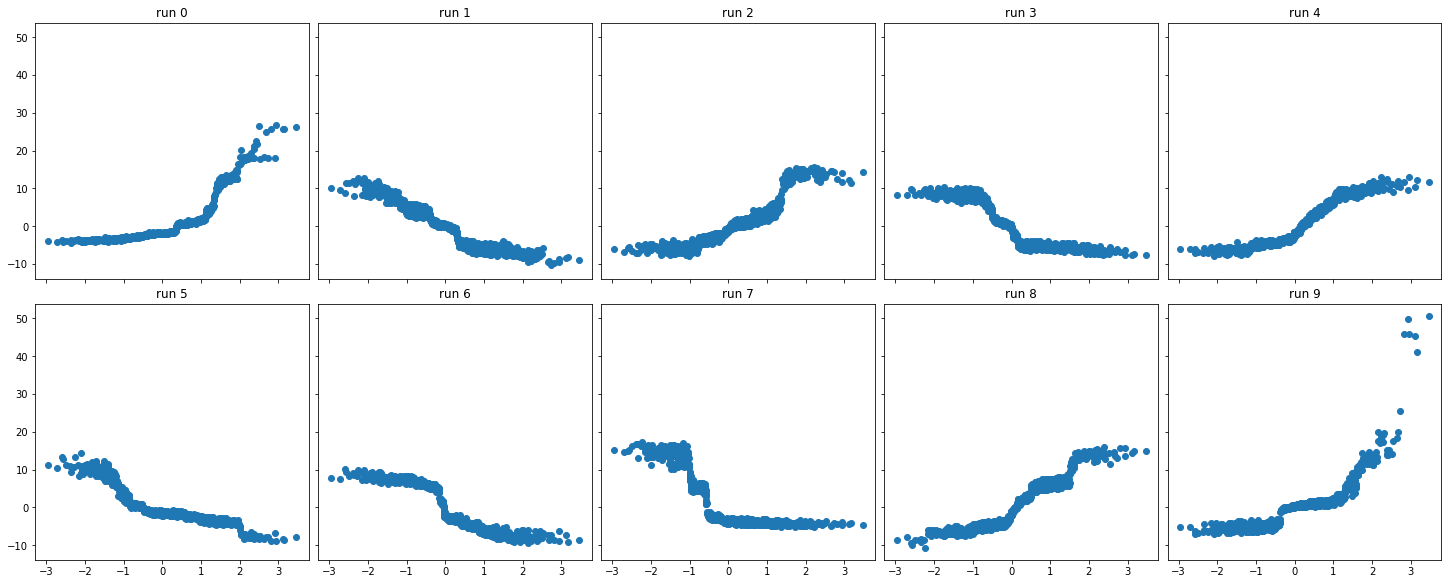

In [11]:
plot_across_runs(hp_results, X, vary_n=False, pc_no=0, save=False, experiment_name="hp_PC0_across_runs", n=n)

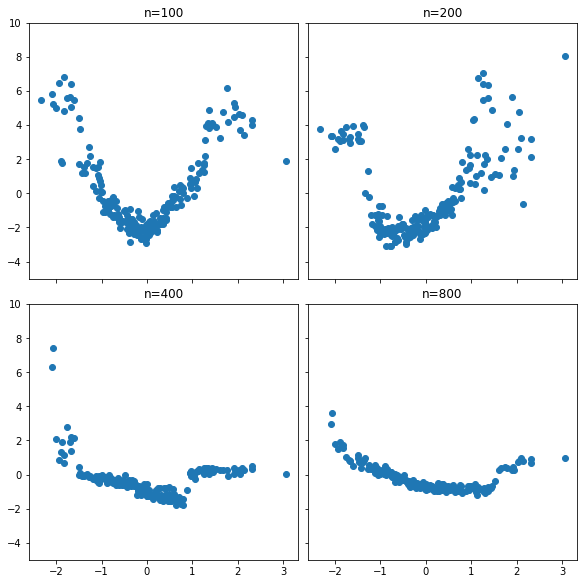

In [483]:
plot_across_runs(ss_results, X, vary_n=True, pc_no=1, save=True, experiment_name="ss_PC1_across_n", r=1, ylim=[-5,10])